In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

In [3]:
# Перетворення категоріальних змінних на числові
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [4]:
# Вибір фічей та цільової змінної
X = data.drop(columns='charges')
y = data['charges']

In [5]:
# Нормалізація фічей
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Розбиття датасету на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Створення та навчання моделі
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

In [10]:
# Обчислення метрик MSE та MAPE
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

MSE: 33596915.851361476
MAPE: 0.4688825597914689


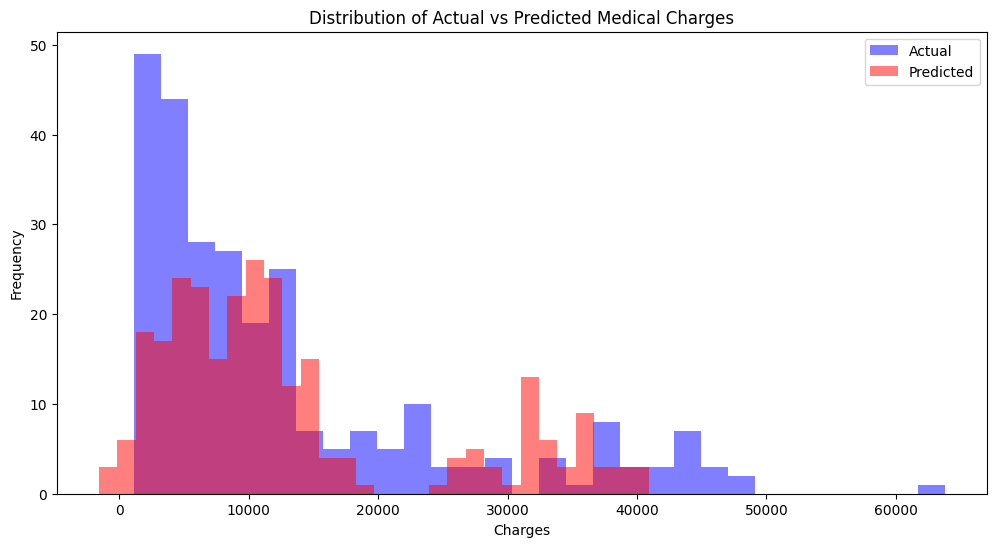

In [11]:
# Гістограма для порівняння розподілу дійсних та передбачених значень
plt.figure(figsize=(12, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted', color='red')
plt.legend(loc='upper right')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Medical Charges')
plt.show()

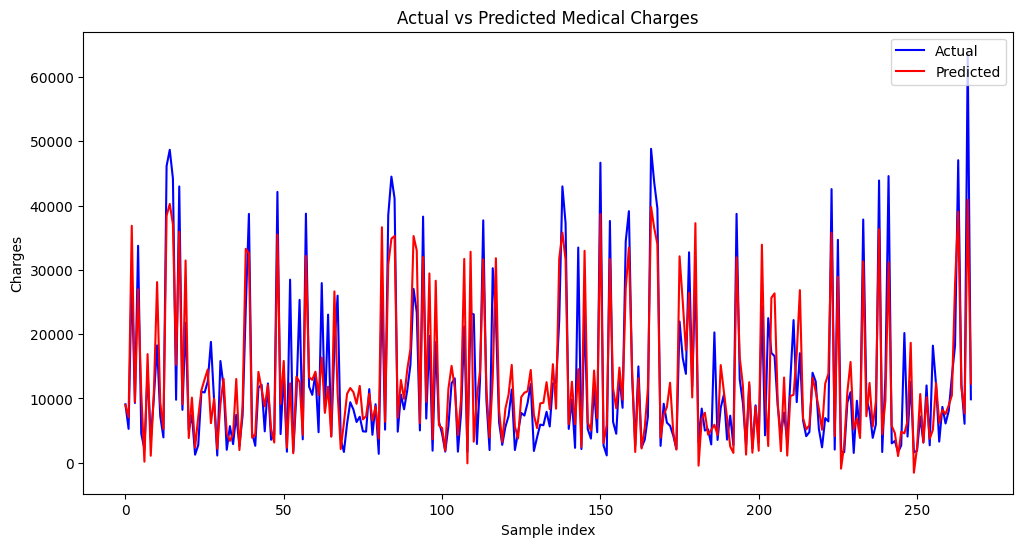

In [12]:
# Лінійний графік для порівняння дійсних та передбачених значень
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend(loc='upper right')
plt.xlabel('Sample index')
plt.ylabel('Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

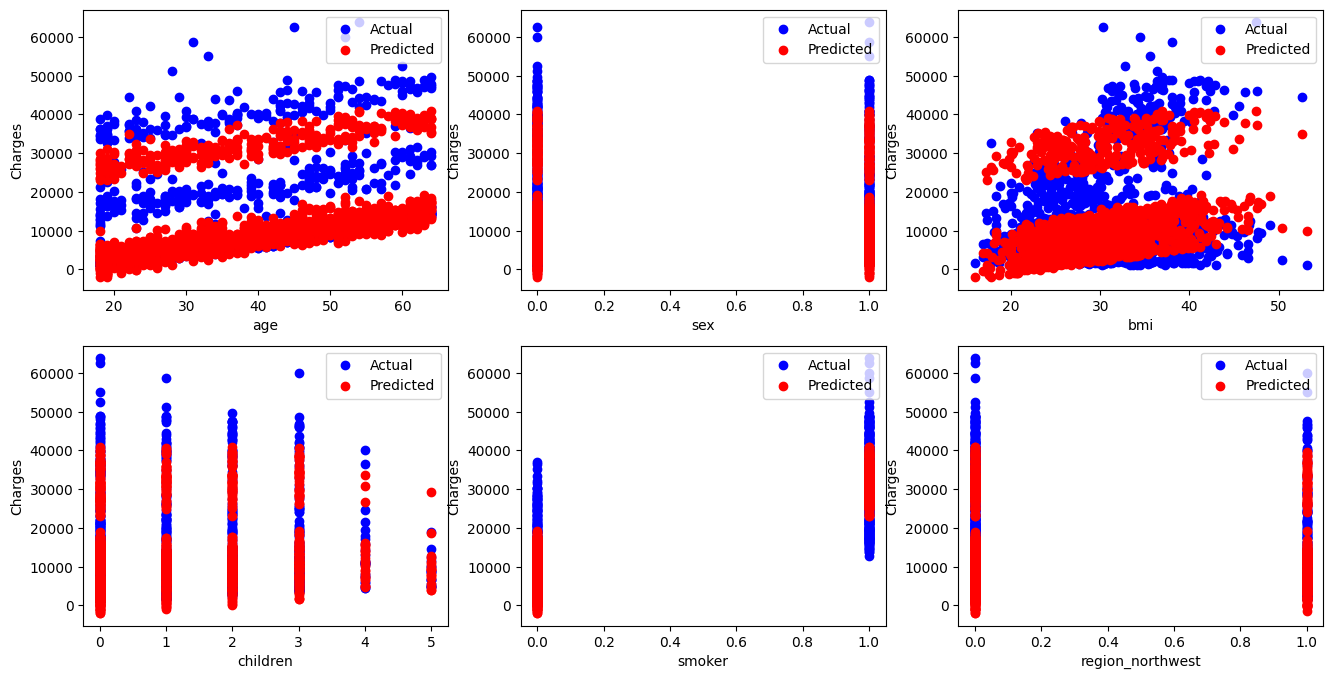

In [14]:
# Графік розсіювання впливу кожної ознаки на витрати
plt.figure(figsize=(16, 8))
for i, column in enumerate(X.columns):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[column], y, color='blue', label='Actual')
    plt.scatter(X[column], model.predict(X_scaled), color='red', label='Predicted')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()